In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten,Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
df1 = pd.read_csv(r"D:\Deep Learning\Deep Learning - Datasets\CIFAR 10\cifar10\train.csv")
df2 = pd.read_csv(r"D:\Deep Learning\Deep Learning - Datasets\CIFAR 10\cifar10\test.csv")


In [8]:
df1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,151,156,155,153,153,157,161,161,161,...,68,64,61,63,59,57,56,53,54,2
49996,255,254,255,254,254,254,254,253,254,254,...,61,64,68,64,76,82,79,81,76,6
49997,35,40,42,39,43,45,48,51,53,56,...,94,104,103,96,93,87,77,66,50,9
49998,189,186,185,184,182,181,180,180,181,180,...,166,171,171,172,169,165,169,171,171,1


In [9]:
df2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,76,77,76,75,76,76,76,76,78,...,228,185,177,223,239,239,235,236,234,236
9996,81,91,98,106,108,110,80,84,88,90,...,126,107,143,155,156,160,173,129,147,160
9997,20,19,15,15,14,13,12,11,10,9,...,114,112,68,50,52,52,51,50,53,47
9998,25,15,23,17,23,51,74,91,114,137,...,87,84,83,84,79,78,78,80,81,80


In [11]:
y_train = df1['label'].values
x_train = df1.drop(labels=['label'],axis=1)

In [14]:
x_train.shape

(50000, 3072)

In [15]:
y_train.shape

(50000,)

In [16]:
x_test=df2

In [17]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

In [18]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [19]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax'),
])

In [25]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
H = model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 7s 3ms/step - loss: 1.9636 - accuracy: 0.2872
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7658 - accuracy: 0.3665
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6647 - accuracy: 0.4047
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5986 - accuracy: 0.4298
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5455 - accuracy: 0.4479
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5045 - accuracy: 0.4624
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4713 - accuracy: 0.4748
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4371 - accuracy: 0.4855
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4098 - accuracy: 0.4955
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.385

In [26]:
test_loss,test_acc = model.evaluate(x_test)

313/313 [==============================] - 0s 923us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [27]:
print("Losss : {}".format(test_loss))
print("Accuracy : {}".format(test_acc))

Losss : 0.0
Accuracy : 0.0


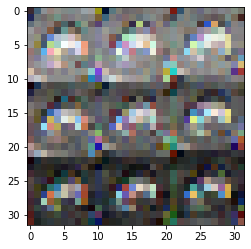

In [28]:
plt.imshow(x_train[0])

In [34]:
class_names = ['airplane','automobileird','cat','deer','dog','frog','horse','ship','truck']
class_names

['airplane',
 'automobileird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

313/313 [==============================] - 1s 2ms/step
Predicted image belongs to class truck


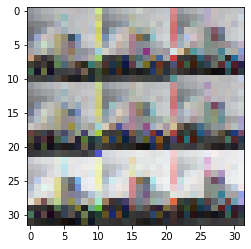

In [35]:
import random


n = random.randint(0,999)
plt.imshow(x_test[n])

predicted_value = model.predict(x_test)
output = np.argmax(predicted_value[n])
print("Predicted image belongs to class {}".format(class_names[output]))

